In [5]:
#Importing Libraries, execute once and forget.
import scipy
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Jaccard Coefficient


In [6]:
def jaccard(q,d):
    qset = set(q.lower().split()) # Results should be calculated based on case insesnitive text
    dset = set(d.lower().split()) # tokenizing the docs 
    
    jaccScore = len(qset.intersection(dset))*1.0/len(qset.union(dset)) # Jaccard coefficient
    
    return jaccScore


query = "ides in March"
document = "Caesar died in march"

print jaccard(query,document)

0.4


In [7]:
#Loading dataset - Our dataset is collection of 208 documents. Each document is an episode from How I met your mother.

docs = eval(open('eps.txt').read())
print 'Total number of docuemnts - ',len(docs)

# eps is a list, with ep1 is a string which contains all sentences in episode 1. [ep1, ep2, ep3]

Total number of docuemnts -  208


The following snippet calculates the Jaccard coefficent of the Query with each of the 2000 documents in the **docs** list.

### Exercise

 - Can you try to figure out top 10 entries with highest jaccard coefficient, print the document indices?
 - Try different queries. 

208


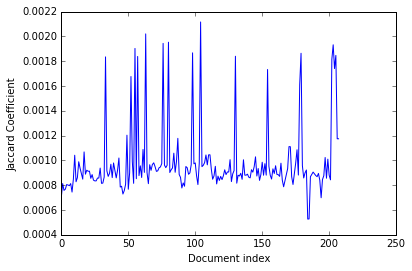

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
jacScoreDoc = list()

query = "ides of March"

for item in docs:
    jacScoreDoc.append(jaccard(query,item))

print len(jacScoreDoc)    

plt.plot(jacScoreDoc)
plt.ylabel('Jaccard Coefficient')
plt.xlabel('Document index')
plt.show()

In [9]:
#Dont forget to run this cell. This is your new dataset.


docs = ['escalators do not break down they just turn from escalators to stairs after they break down',
'I am sorry and I apologize mean the same thing except when you are at a funeral',
'I intend to live forever or die trying',
'we never knew he was a drunk until he showed up to work sober',
'a clear conscience is usually the sign of a bad memory',
'ever and ever forever and ever you Will be the one That shines in me like the morning sun'
       ]

# Vector Space Model - Binary

[[ 0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
   0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.
   0.  0.  1.  1.  0.  0.  1.  1.  1.  0.]
 [ 1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.
   0.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.
   0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.
   0.  0.  1.  0.  0.  0.  1.  1.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.
   0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  1.  1.  0.  0.  1.  0.
   0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.

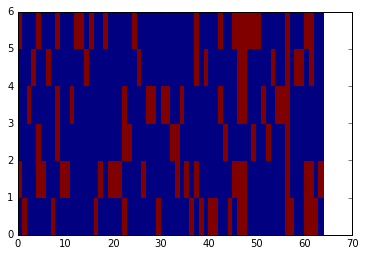

In [10]:
uniqWords = set()
wordCount = dict()

for doc in docs:
    for word in doc.split():
        uniqWords.add(word)
        try:
            wordCount[word] += 1
        except:
            wordCount[word] = 1
            
VSMbin = np.zeros((len(docs),len(uniqWords)))

uniqList = list(uniqWords)
for item in uniqList:
    for doc in docs:
        if item in doc:
            VSMbin[docs.index(doc),uniqList.index(item)] = 1
            
print VSMbin
plt.pcolor(VSMbin)

# Vector Space Model - Count Vectors

[[ 0.  1.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
   0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   1.  0.  2.  0.  2.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  1.  0.  0.  0.  0.  2.  0.]
 [ 1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.
   0.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  2.  0.  1.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  1.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.
   0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  1.  1.  0.  0.  1.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  1.  0.  0.

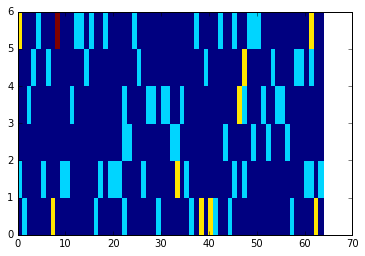

In [12]:
from collections import defaultdict

uniqWords = set()
wordDocCount = defaultdict(dict)

for doc in docs:
    for word in doc.split():
        uniqWords.add(word)
        try:
            wordDocCount[word][docs.index(doc)] += 1
        except:
            wordDocCount[word][docs.index(doc)] = 1
            
VSMCount = np.zeros((len(docs),len(uniqWords)))

uniqList = list(uniqWords)
for item in uniqList:
    for doc in docs:
        if item in doc:
                try:
                    VSMCount[docs.index(doc),uniqList.index(item)] = wordDocCount[item][docs.index(doc)]
                except:
                    pass
            
print VSMCount
plt.pcolor(VSMCount)

# VSM - TFIDF

[[ 0.          0.77815125  0.          0.          0.          0.          0.
   1.3175246   0.          0.          0.          0.          0.          0.
   0.          0.          0.77815125  0.          0.          0.          0.
   0.          0.30103     0.          0.          0.          0.          0.
   0.          0.77815125  0.          0.          0.          0.          0.
   0.          0.77815125  0.          1.3175246   0.          1.3175246
   0.77815125  0.          0.          0.77815125  0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.77815125  0.          0.          0.          0.
   1.3175246   0.        ]
 [ 0.47712125  0.          0.          0.          0.          0.77815125
   0.          0.          0.          0.77815125  0.77815125  0.          0.
   0.          0.          0.          0.          0.77815125  0.
   0.77815125  0.77815125  0.77815125  0.          0.     

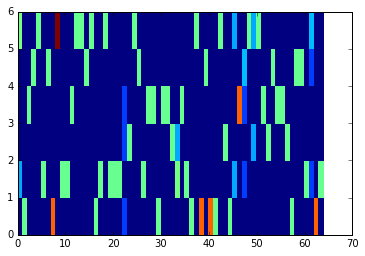

In [13]:
import math

VSMTFIDF = np.zeros((len(docs),len(uniqWords)))
for item in uniqList:
    for doc in docs:
        if item in doc:
            try:
                VSMTFIDF[docs.index(doc),uniqList.index(item)] = (1+ math.log(wordDocCount[item][docs.index(doc)])) * math.log10(len(docs)*1.0/len(wordDocCount[item]))
            except:
                pass
            
print VSMTFIDF
plt.pcolor(VSMTFIDF)

## All is not well with real data, without preprocessing

**docsRealData** has the same content as **docs**. But **docsRealData** is more close to how proper english is written.

Can you figure out and write code to get rid of the inconsistencies?

Hint - 

    Case Folding - lower()
    Stop word removal - Collect a lsit of words and remove them from corpus, easily available online
    Punctuation removal

In [44]:
docsRealData = ['Escalators do not break down, they just turn from escalators to stairs after they break down.',
'"I am sorry" and "I apologize" mean the same thing, except when you are at a funeral',
'I intend to live forever or die trying.',
'We never knew he was a drunk until he showed up to work sober.',
'A clear conscience is usually the sign of a bad memory.',
'Ever and ever forever and ever you Will be the one That shines in me like the morning sun.']

uniqRealWords = set()
for doc in docsRealData:
    for word in doc.split():
        uniqRealWords.add(word)
        
print "Number of unique words in both the sets",len(uniqRealWords),len(uniqWords)
print "Difference of sets of data:\n",uniqRealWords - uniqWords

Number of unique words in both the sets 69 64
Difference of sets of data:
set(['A', 'We', '"I', 'apologize"', 'sun.', 'down,', 'thing,', 'down.', 'sorry"', 'memory.', 'Ever', 'Escalators', 'trying.', 'sober.'])
